 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pandas_datareader import data
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('/Users/Dylan/Downloads/Starter_Code-5/Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True)
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path('/Users/Dylan/Downloads/Starter_Code-5/Resources/algo_returns.csv')
algo_df =  pd.read_csv(algo_path, index_col='Date',parse_dates=True)

In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path('/Users/Dylan/Downloads/Starter_Code-5/Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True)

In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace('\$','').astype(float)
sp500_df.head()

/Users/Dylan/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={'Close':'SP500'})
sp500_df

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df,algo_df,sp500_df], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

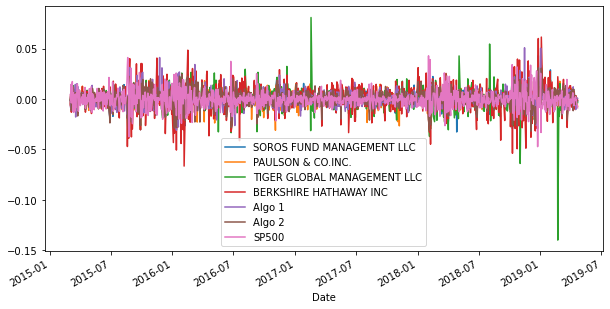

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

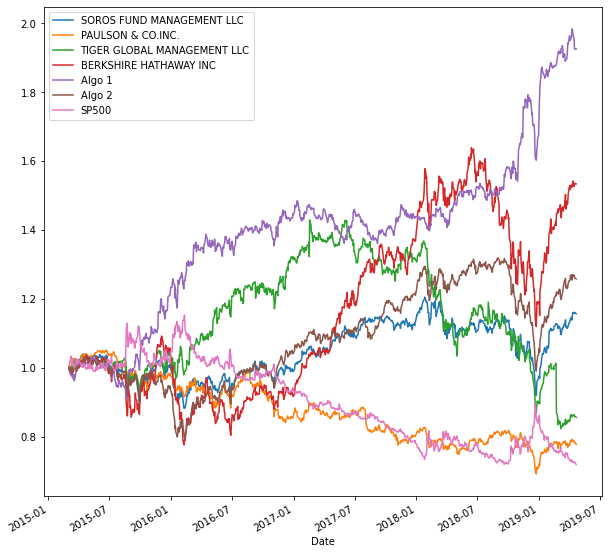

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

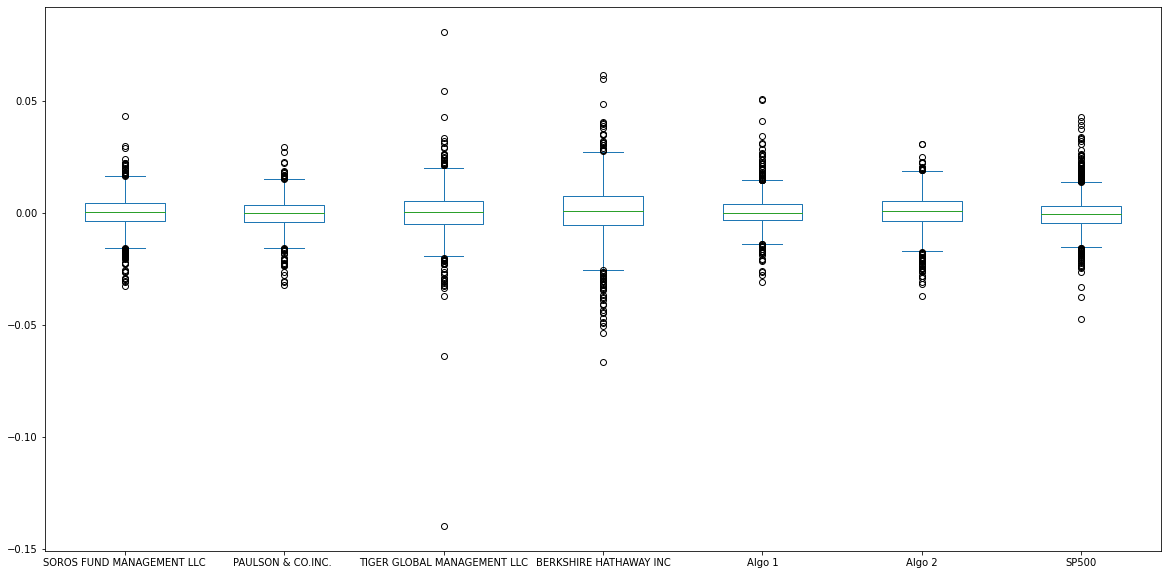

In [17]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp_500_std = sp500_df.std()
print(sp_500_std)
# Determine which portfolios are riskier than the S&P 500
riskier = daily_std[daily_std > daily_std['SP500']]
print(riskier)

SP500    0.008135
dtype: float64
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

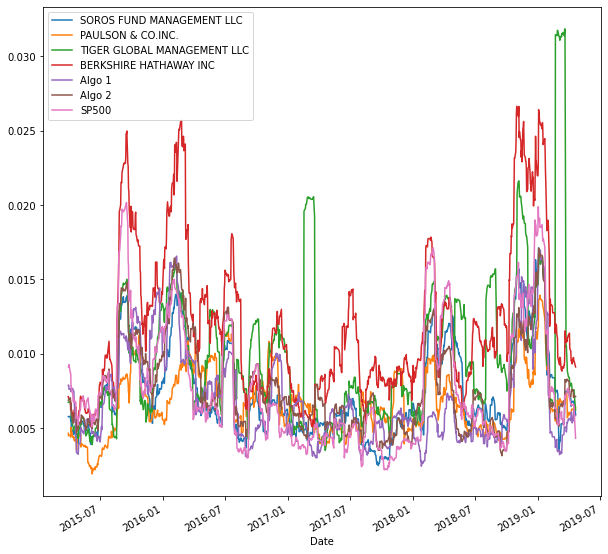

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_rolling.plot(figsize=[10,10])

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


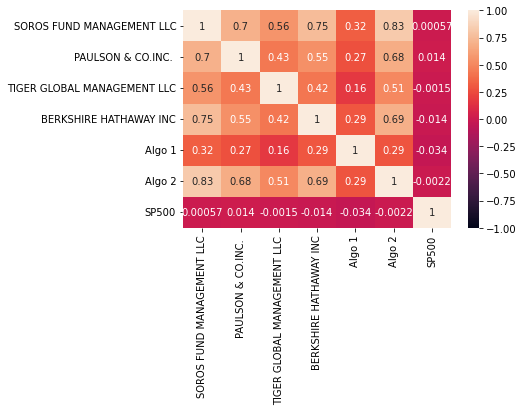

In [22]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta Plot'}, xlabel='Date'>

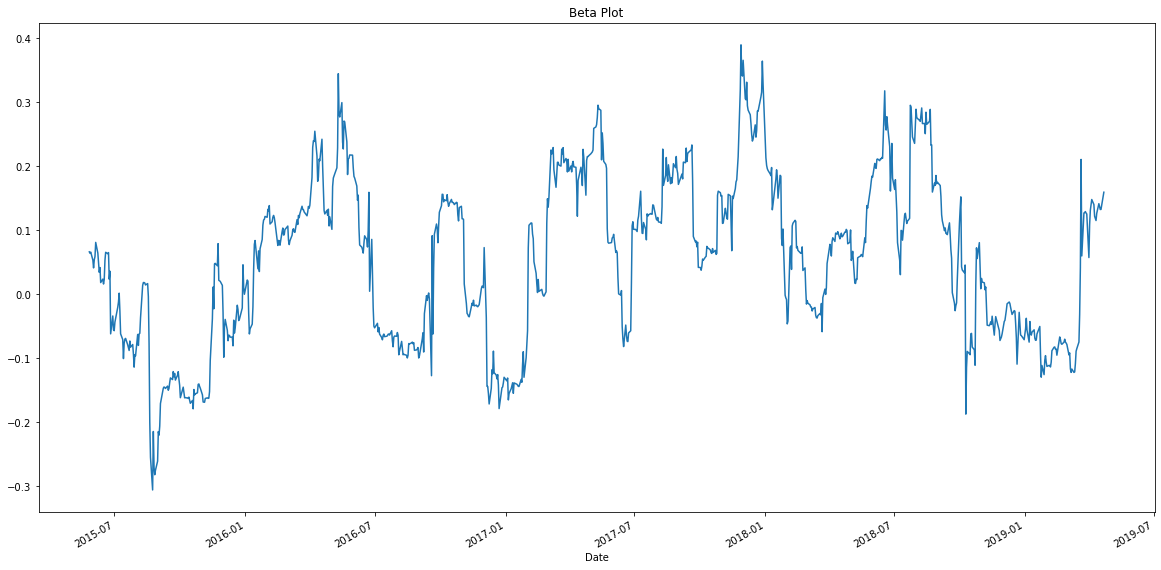

In [23]:
# Calculate covariance of a single portfolio
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['SP500'])

# Calculate variance of S&P 500
variance = combined_df['SP500'].rolling(window=60).var()

# Computing beta
beta = covariance / variance
beta = beta.dropna()
beta.sort_index()
beta
# Plot beta trend
beta.plot(figsize=(20,10), title='Beta Plot')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

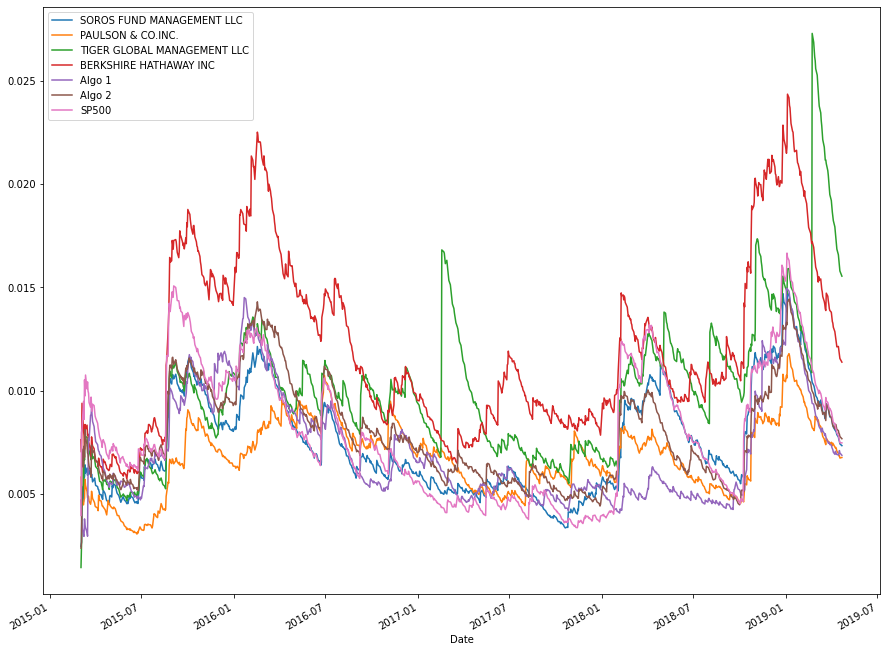

In [24]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(15,12))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratio_2 = combined_df.mean()*252 / combined_df.std()*np.sqrt(252)
sharpe_ratio_2

SOROS FUND MANAGEMENT LLC       86.409176
PAULSON & CO.INC.             -123.838434
TIGER GLOBAL MANAGEMENT LLC    -32.806958
BERKSHIRE HATHAWAY INC         152.899121
Algo 1                         345.136425
Algo 2                         122.052242
SP500                         -130.682708
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

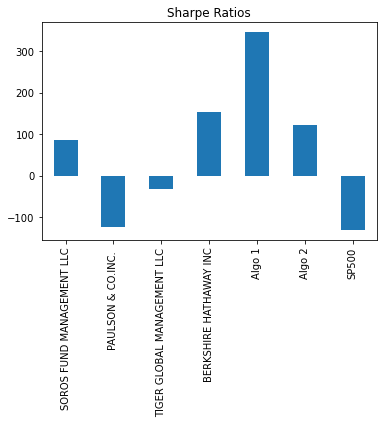

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_2.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algorithm 1 outperforms both the S&P 500 and whale portfolios.

Algorithm 2 outperforms the S&P 500, but has been surpassed by Berkshire Hathaway Inc.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
#  Reading data from 1st stock
coke_path = Path('/Users/Dylan/Downloads/2016_coke_close - Sheet1.csv')
coke_raw = pd.read_csv(coke_path, index_col='Date', parse_dates=True)

#Renamed 'Close' to fit data
coke_data = coke_raw.rename(columns={'Close':'Coke'})
coke_data

,Coke
Date,
2016-06-01 16:00:00,124.92
2016-06-02 16:00:00,124.56
2016-06-03 16:00:00,124.27
2016-06-06 16:00:00,125.96
2016-06-07 16:00:00,123.83
...,...
2019-05-24 16:00:00,307.34
2019-05-28 16:00:00,305.66
2019-05-29 16:00:00,306.20


In [28]:
# Reading data from 2nd stock
apple_path = Path('/Users/Dylan/Downloads/2016_apple_close - Sheet1.csv')
apple_raw = pd.read_csv(apple_path, index_col='Date', parse_dates=True)

#Renamed 'Close' to fit data
apple_data = apple_raw.rename(columns={'Close':'Apple'})
apple_data

,Apple
Date,
2016-06-01 16:00:00,24.62
2016-06-02 16:00:00,24.43
2016-06-03 16:00:00,24.48
2016-06-06 16:00:00,24.66
2016-06-07 16:00:00,24.76
...,...
2019-05-24 16:00:00,44.74
2019-05-28 16:00:00,44.56
2019-05-29 16:00:00,44.35


In [29]:
# Reading data from 3rd stock
meta_sheet = Path('/Users/Dylan/Downloads/2016_meta_close - Sheet1.csv')
meta_raw = pd.read_csv(meta_sheet, index_col='Date', parse_dates=True)

#Renamed 'Close' to fit data
meta_data = meta_raw.rename(columns={'Close':'Meta'})
meta_data

,Meta
Date,
2016-06-01 16:00:00,118.78
2016-06-02 16:00:00,118.93
2016-06-03 16:00:00,118.47
2016-06-06 16:00:00,118.79
2016-06-07 16:00:00,117.76
...,...
2019-05-24 16:00:00,181.06
2019-05-28 16:00:00,184.31
2019-05-29 16:00:00,182.19


In [30]:
# Combine all stocks in a single DataFrame
combined_pf = pd.concat([coke_data,apple_data,meta_data], axis='columns', join='inner')
combined_pf.head()

,Coke,Apple,Meta
Date,,,
2016-06-01 16:00:00,124.92,24.62,118.78
2016-06-02 16:00:00,124.56,24.43,118.93
2016-06-03 16:00:00,124.27,24.48,118.47
2016-06-06 16:00:00,125.96,24.66,118.79
2016-06-07 16:00:00,123.83,24.76,117.76


In [31]:
# Reset Date index
combined_pf.index=combined_pf.index.date
combined_pf.head()

,Coke,Apple,Meta
2016-06-01,124.92,24.62,118.78
2016-06-02,124.56,24.43,118.93
2016-06-03,124.27,24.48,118.47
2016-06-06,125.96,24.66,118.79
2016-06-07,123.83,24.76,117.76


In [32]:
# Calculate daily returns
combined_returns = combined_pf.pct_change()
combined_returns.dropna(inplace=True)
combined_returns.head()

,Coke,Apple,Meta
2016-06-02,-0.002882,-0.007717,0.001263
2016-06-03,-0.002328,0.002047,-0.003868
2016-06-06,0.013599,0.007353,0.002701
2016-06-07,-0.016910,0.004055,-0.008671
2016-06-08,0.003634,-0.000808,0.005350


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
returns = combined_returns.dot(weights)
returns.columns = ['Portfolio']

# Display sample data
print(returns.columns)
returns.head()

['Portfolio']


2016-06-02   -0.003112
2016-06-03   -0.001383
2016-06-06    0.007884
2016-06-07   -0.007175
2016-06-08    0.002725
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
combined_data = pd.concat([whale_df,algo_df,sp500_df, returns], axis="columns", join="inner")
combined_data.head()


/Users/Dylan/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexes/base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
2016-06-02,0.011018,0.009953,0.008231,0.001563,-0.006819,0.006574,0.002920,-0.003112
2016-06-03,0.000180,-0.002503,0.002553,-0.015424,0.019975,-0.005710,-0.004873,-0.001383
2016-06-06,0.004054,0.008038,-0.000789,0.009988,-0.002858,0.012116,-0.001288,0.007884
2016-06-07,0.003545,0.000857,-0.001582,-0.015105,0.008739,0.002300,-0.003299,-0.007175
2016-06-08,0.000461,-0.000279,0.004087,-0.014419,0.001054,0.006270,0.001721,0.002725


In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_data.dropna(inplace=True)
combined_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
2016-06-02,0.011018,0.009953,0.008231,0.001563,-0.006819,0.006574,0.002920,-0.003112
2016-06-03,0.000180,-0.002503,0.002553,-0.015424,0.019975,-0.005710,-0.004873,-0.001383
2016-06-06,0.004054,0.008038,-0.000789,0.009988,-0.002858,0.012116,-0.001288,0.007884
2016-06-07,0.003545,0.000857,-0.001582,-0.015105,0.008739,0.002300,-0.003299,-0.007175
2016-06-08,0.000461,-0.000279,0.004087,-0.014419,0.001054,0.006270,0.001721,0.002725
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.010393
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.004220
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.005264
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.008639


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
risk = combined_data.std()
print(risk.sort_values())

Algo 1                         0.006735
PAULSON & CO.INC.              0.007018
SOROS FUND MANAGEMENT LLC      0.007621
Algo 2                         0.007668
SP500                          0.007945
TIGER GLOBAL MANAGEMENT LLC    0.011456
0                              0.012128
BERKSHIRE HATHAWAY INC         0.012159
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

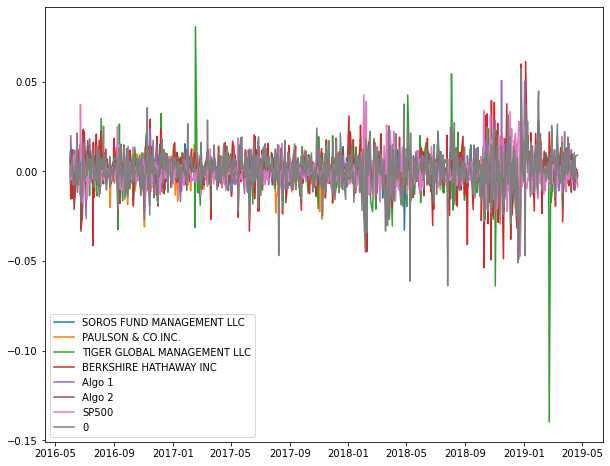

In [37]:
# Calculate rolling standard deviation
combined_data.rolling(window=21).std()
# Plot rolling standard deviation
combined_data.plot(figsize=(10,8))

### Calculate and plot the correlation

<AxesSubplot:>

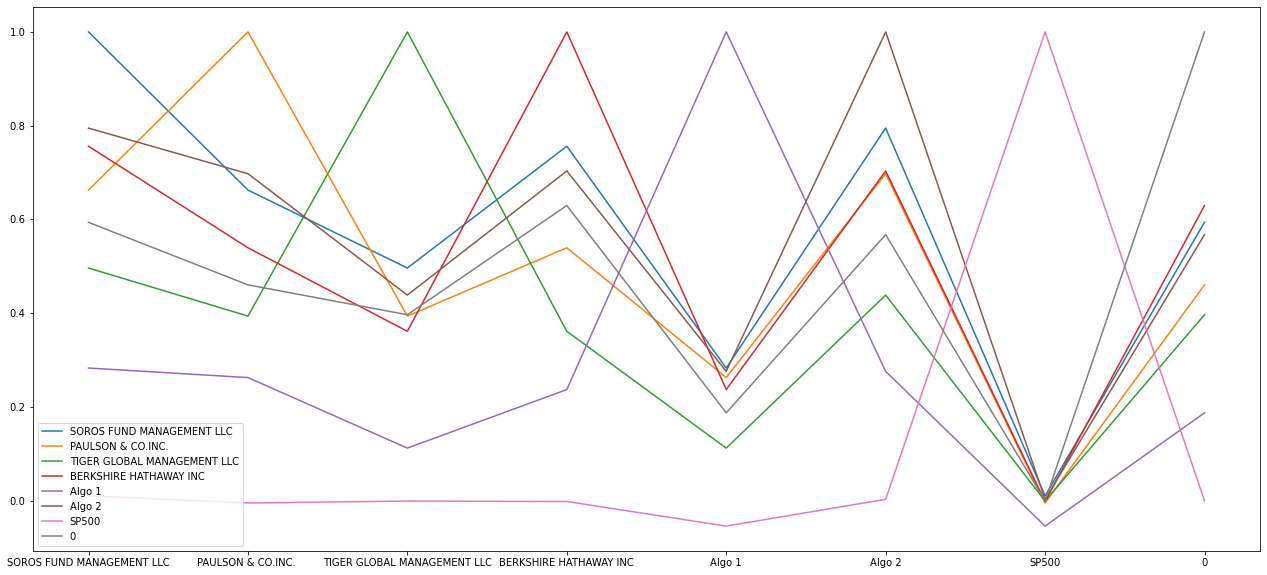

In [38]:
# Calculate and plot the correlation
corr = combined_data.corr()
corr.plot(figsize=[22,10])

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta Plot'}, xlabel='Date'>

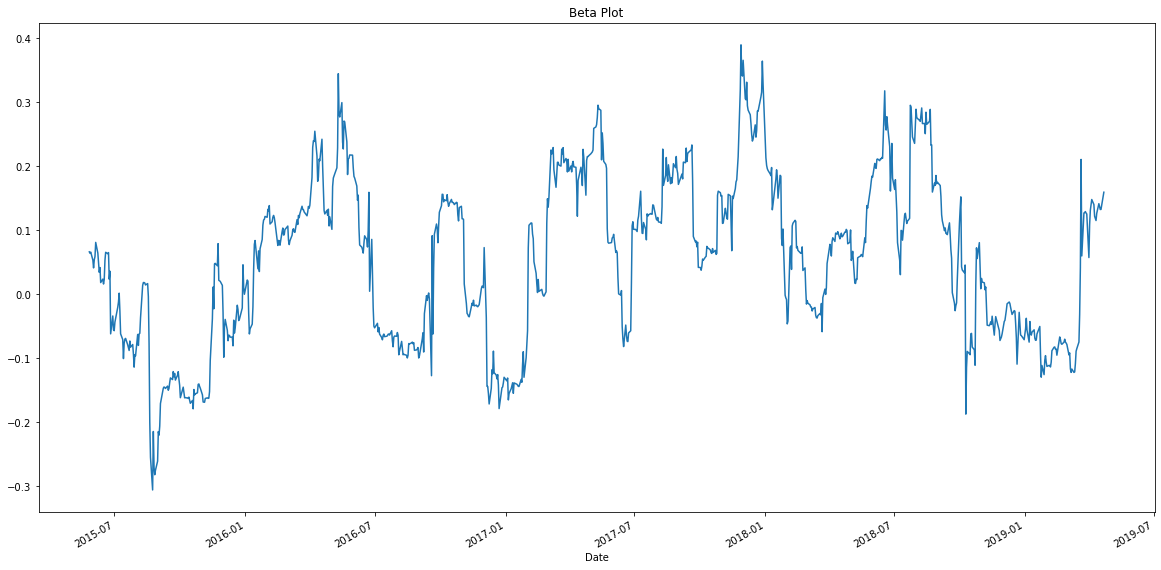

In [39]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance_2 = combined_data['Algo 1'].rolling(window=60).cov(combined_data['SP500'])

# Calculate variance of S&P 500
variance_2 = combined_data['SP500'].rolling(window=60).var()

# Computing beta
beta_2 = covariance_2 / variance_2
beta_2 = beta.dropna()
beta_2.sort_index()
# Plot beta trend
beta_2.plot(figsize=(20,10), title='Beta Plot')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_2 = (combined_data.mean() * 252) / (combined_data.std() * np.sqrt(252))
sharpe_ratio_2.sort_values()

SP500                         -0.850194
PAULSON & CO.INC.             -0.514978
TIGER GLOBAL MANAGEMENT LLC   -0.502457
SOROS FUND MANAGEMENT LLC      0.580998
Algo 2                         0.886171
BERKSHIRE HATHAWAY INC         1.053205
Algo 1                         1.248151
0                              1.438204
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

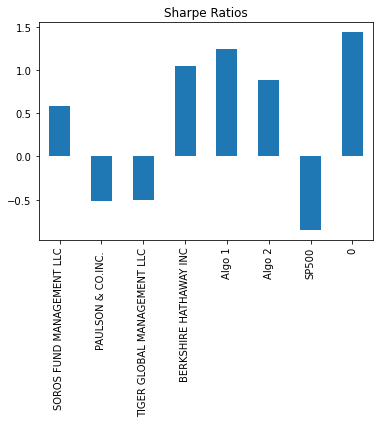

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_2.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

My portfolio outperforms the S&P 500, along with Algo 1, Algo 2, and Berkshire Hathaway INC!
I am aware my S&P 500 value is inverted but I cannot figure our my error for the life of me, it is somewhere, in the bottom cells, I suspect.